In [1]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [5]:
# 정규표현식
import re

In [6]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [9]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2024-12-27 10:07:42.426683


'2024-12-27'

In [11]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,‘오징어게임2’ 외신 혹평에...테마주 동반 폭락,"\n 사진 확대 ‘오징어 게임2’. 제공|넷플릭스 전 세계적 기대작 넷플릭스 ‘오징어 게임2’가 공개된 다음 날인 27일 장 초반 관련 종목들이 급락하고 있다.이날 오전 9시 20분 현재 아티스트스튜디오(200350)가 26.68% 급락 중이며, 아티스트유나이티드(321820)도 23.98% 하락하고 있다.아티스트스튜디오와 아티스트유나이티드는 시즌1에 이어 ‘오징어게임2’에서도 주연을 맡은 배우 이정재가 대주주로 있는 기업이다.또 ‘오징어게임2’의 영상 특수효과를 맡은 위지윅스튜디오(299900)는 20.00% 하락했고, 덱스터(206560)는 18.59% 내려 거래되고 있다.‘오징어게임’ 제작사인 싸이런픽쳐스에 투자한 쇼박스(086980)도 14.97% 급락을 면치 못하고 있다.지난 2021년 9월 공개돼 전 세계적으로 폭발적인 인기를 얻었던 ‘오징어 게임’의 후속작인 ‘오징어 게임2’는 지난 26일 오후 5시(한국시간) 넷플릭스를 통해 공개됐다.큰 기대 속에 베일을 벗은 ‘오징어게임2’에 대해 해외 주요 매체들은 “이야기가 정체돼있다’”, “날카로움을 잃었다”, “재미도 기발함도 없다”는 등 첫 시즌에 비해 실망스럽다는 반응을 보이고 있다.국내 시청자들도 대체로 시즌1만 못하다는 반응을 보이고 있으며 특히 그룹 빅뱅 출신 탑(최승현)의 오글거리는 연기에 혹평을 보내고 있다.시즌2에 이어지는 ‘오징어게임3’가 내년에 공개된다.\n",2024-12-27 09:38:05


In [12]:
df.shape

(100, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [14]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,95
top,매일경제,‘오징어게임2’ 외신 혹평에...테마주 동반 폭락,"\n 사진 확대 ‘오징어 게임2’. 제공|넷플릭스 전 세계적 기대작 넷플릭스 ‘오징어 게임2’가 공개된 다음 날인 27일 장 초반 관련 종목들이 급락하고 있다.이날 오전 9시 20분 현재 아티스트스튜디오(200350)가 26.68% 급락 중이며, 아티스트유나이티드(321820)도 23.98% 하락하고 있다.아티스트스튜디오와 아티스트유나이티드는 시즌1에 이어 ‘오징어게임2’에서도 주연을 맡은 배우 이정재가 대주주로 있는 기업이다.또 ‘오징어게임2’의 영상 특수효과를 맡은 위지윅스튜디오(299900)는 20.00% 하락했고, 덱스터(206560)는 18.59% 내려 거래되고 있다.‘오징어게임’ 제작사인 싸이런픽쳐스에 투자한 쇼박스(086980)도 14.97% 급락을 면치 못하고 있다.지난 2021년 9월 공개돼 전 세계적으로 폭발적인 인기를 얻었던 ‘오징어 게임’의 후속작인 ‘오징어 게임2’는 지난 26일 오후 5시(한국시간) 넷플릭스를 통해 공개됐다.큰 기대 속에 베일을 벗은 ‘오징어게임2’에 대해 해외 주요 매체들은 “이야기가 정체돼있다’”, “날카로움을 잃었다”, “재미도 기발함도 없다”는 등 첫 시즌에 비해 실망스럽다는 반응을 보이고 있다.국내 시청자들도 대체로 시즌1만 못하다는 반응을 보이고 있으며 특히 그룹 빅뱅 출신 탑(최승현)의 오글거리는 연기에 혹평을 보내고 있다.시즌2에 이어지는 ‘오징어게임3’가 내년에 공개된다.\n",2024.12.26 18:02
freq,50,1,1,3


In [18]:
df.duplicated().sum()

0

In [19]:
# 중복행만선택
df[df.duplicated()]

,언론사,제목,내용,작성일시


In [24]:
df['언론사'].value_counts()

언론사
매일경제    50
한국경제    50
Name: count, dtype: int64

#### 텍스트 길이 분석

In [25]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [26]:
# 제목,내용 토큰 개수
df['제목_토큰_개수']=df['제목'].str.split().str.len()
df['내용_토큰_개수']=df['내용'].str.split().str.len()

In [27]:
df[['제목_길이','제목_토큰_개수','내용_길이','내용_토큰_개수']].describe()

,제목_길이,제목_토큰_개수,내용_길이,내용_토큰_개수
count,100.000000,100.000000,100.000000,100.000000
mean,34.890000,7.340000,1072.860000,213.690000
std,8.458926,2.050967,518.335701,110.947589
min,13.000000,3.000000,432.000000,81.000000
25%,29.750000,6.000000,727.750000,139.000000
50%,35.000000,7.000000,962.500000,190.000000
75%,40.000000,8.000000,1258.250000,252.250000
max,63.000000,15.000000,3016.000000,660.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_개수  100 non-null    int64 
 7   내용_토큰_개수  100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_개수'}>,
        <Axes: title={'center': '내용_토큰_개수'}>]], dtype=object)

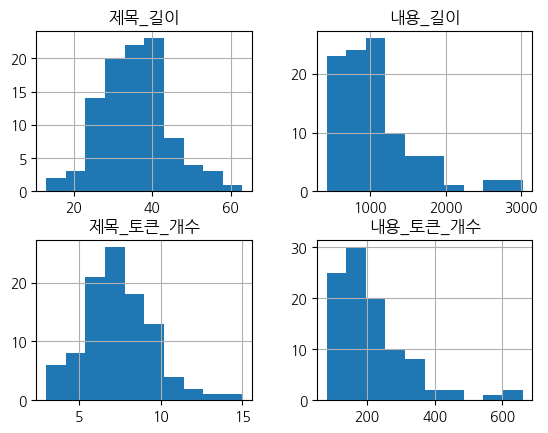

In [28]:
df.hist(bins=10)

In [30]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수
39,매일경제,"[MK시그널] 한화엔진, 선박 엔진 공급 계약 소식에 주가 상승세... MK시그널 추천 후 상승률 8.29% 기록","\n 사진 확대 12월 26일 한화엔진(082740)이 강세다. 전일 한화엔진 주가는 종가 기준 1.84% 하락한 17,640원에 마감했다. 현재는 18,890원으로 (10시 8분 기준) 전일 종가 대비 7.03% 상승한 상태를 보이고 있다.MK시그널은 한화엔진을 AI 2호를 통해 24년 12월 24일 매수 추천했으며, 목표가 및 손절가 도달 전 보유 전략을 통해 8.16%의 평가손익 수익률을 기록하고 있다.(MK시그널의 투자전략에 따른 수익 성과는 투자자별로 상이할 수 있습니다.)인공지능이 선정한 포트폴리오 AI 2호는 컨센서스가 상향된 든든한 실적 우량주로 포트폴리오 구성이 되어 있으며, 펀더멘탈, 수급 등 우량한 종목 대상 투자전략 시그널을 제공하고 있다. 포트폴리오 편입 후 최대 보유 기간은 10일, 목표가 20%, 손절가 10% 원칙으로 편출 전략을 가져가고 있다.한화엔진(082740)은 24일 한화오션과 841억원 규모의 선박용 엔진 공급계약을 체결했다는 소식에 주가가 상승하는 것으로 보인다. 계약 금액은 최근 매출액 대비 8.9%이며, 계약 기간은 지난 24일부터 오는 2027년 10월 25일까지다.MK시그널 현재 ‘첫 달 무료 이벤트’ 진행중!국내 주식과 더불어 미국 주식까지 한 번에! 빅데이터 알고리즘 AI의 추천 종목 매매 신호 받아보세요!인공지능(AI) 기반 매매신호 제공 앱 MK시그널이 뜨거운 성원에 힘입어, 12월 31일까지 고객 감사 할인 이벤트를 진행합니다! 회원가입 시 첫 달 무료 혜택과 함께 평생 최대 50% 할인을 제공합니다. 구글 플레이스토어와 애플 앱스토어에서 앱을 다운로드하고 회원가입 한 모든 회원이 참여할 수 있습니다. 이번 기회를 놓치지 말고 MK시그널과 함께 스마트하고 성공적인 투자를 시작하세요!▶MK시그널 한 달 무료체험하기 (클릭)◀▶MK시그널 iOS 버전 바로 다운받기 (클릭)◀▶MK시그널 안드로이드 버전 다운받기 (클릭)◀HOT 종목 : 쏠리드 한화오션 신성델타테크 엑스게이트 한화시스템 HD현대중공업 하이젠알앤엠\n",2024-12-26 13:46:27,63,1010,15,216


#### 워드클라우드 시각화
- https://github.com/amueller/word_cloud

In [31]:
# 제목을 하나의 문자열로 만들기
news_title = ' '.join(df['제목'])
news_title[:100]

'‘오징어게임2’ 외신 혹평에...테마주 동반 폭락 주가는 뒷걸음질인데 외국인은 산다?…‘게임주’에 쏠리는 시선 두산에너빌리티, 국제핵비확산협력센터와 원전 수출 사업지원 협약 “삼성'

In [ ]:
WordCloud?

In [33]:
def display_word_cloud(str, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

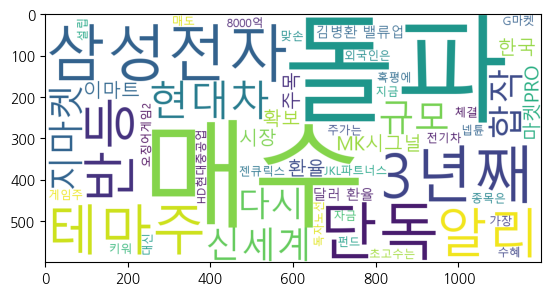

In [35]:
display_word_cloud(news_title,50)

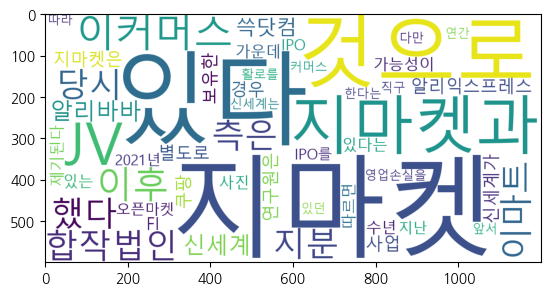

In [36]:
tmp_str = ''.join(df[df['제목'].str.contains('지마켓')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [ ]:
tmp_word_cloud.words_

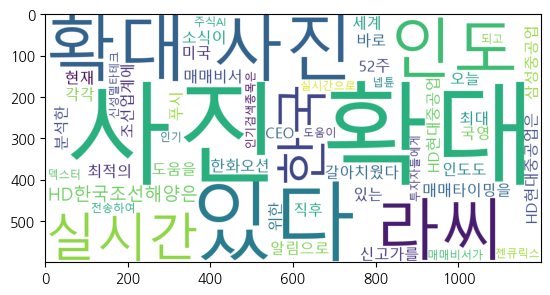

In [37]:
tmp_str = ''.join(df[df['제목'].str.contains('HD현대중공업')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

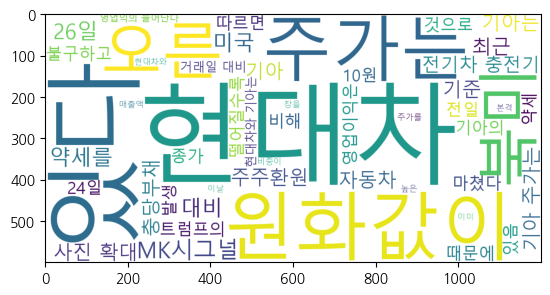

In [38]:
tmp_str = ''.join(df[df['제목'].str.contains('현대차')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

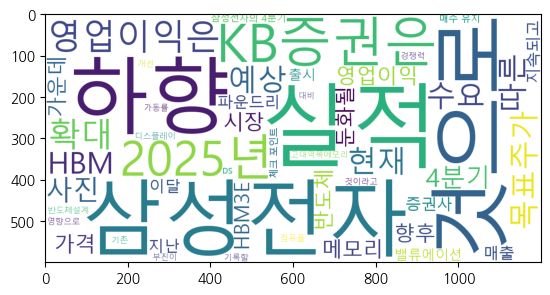

In [39]:
tmp_str = ''.join(df[df['제목'].str.contains('삼성전자')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

#### 형태소 분석기로 특정 품사만 추출하기

In [ ]:
# !pip install pecab

In [40]:
from pecab import PeCab
pecab = PeCab()


In [43]:
dir(pecab)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_tokenize',
 'morphs',
 'nouns',
 'pos',
 'postprocessor',
 'tokenizer']

In [44]:
text = '아버지가 방에 들어가신다'

In [53]:
pecab.postprocessor?

Type:        Postprocessor
String form: <pecab._postprocessor.Postprocessor object at 0x0000017B0B05C080>
File:        d:\kdt_2\anaconda3\lib\site-packages\pecab\_postprocessor.py
Docstring:   <no docstring>

In [57]:
print(pecab.morphs(text))
print(pecab.nouns(text))
print(pecab.pos(text))
# print(pecab.postprocessor)
# print(pecab.tokenizer(text))

['아버지', '가', '방', '에', '들어가', '신다']
['아버지', '방']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


In [58]:
pecab.nouns('아버지가 방에 들어가신다 주말 여행 영남권')

['아버지', '방', '주말', '여행', '영남']

In [61]:
# 처리시간이 걸리는 작업의 진행률을 시각화해줌
from tqdm import tqdm
tqdm.pandas()

In [65]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:00<00:00, 33293.41it/s]


In [67]:
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치
1. 최신 버전의 JAVA(JDK)를 설치
2. JAVA_HOME 환경변수를 추가
3. path 환경변수에 %JAVA_HOME%\bin; 추가

### konlpy 설치   
- pip install --upgrade pip
- pip install JPype1   (java,python 연계 역할)
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install/

In [68]:
from konlpy.tag import Okt
okt = Okt()

In [71]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [72]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [73]:
okt.nouns(txt)

['아버지', '방']

In [74]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:08<00:00, 11.50it/s]


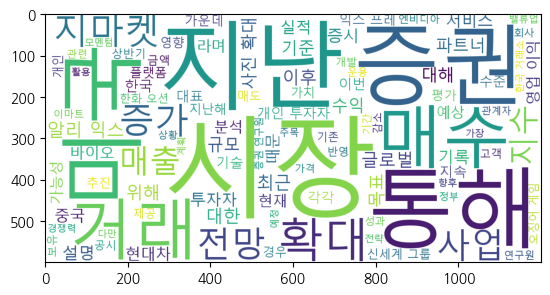

In [75]:
str = ''.join(df['내용_명사'])
dwc = display_word_cloud(str,100)

In [94]:
tmp = df.loc[df[df['내용_명사'].str.contains('통해')].index].head(1)['내용'][0]

In [100]:
for word, tag in okt.pos(tmp) :
# for word, tag in pecab.pos(tmp) :
    if word == '통해' :
        print(word, tag)

통해 Noun


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect = CountVectorizer()

In [ ]:
X = cvect.fit_transform(df['내용_명사'])

In [ ]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())
tmp.shape

In [ ]:
df.columns

In [ ]:
tmp.sum().sort_values(ascending=False)